### Topographic maps using MNE

Reading /Users/jorgerivera/Library/CloudStorage/Dropbox/Programming/eeg-project/eeg-project/data/eeglab_data.fdt
Reading 0 ... 30503  =      0.000 ...   238.305 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished


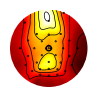

(<matplotlib.image.AxesImage at 0x1461861f0>,
 <matplotlib.contour.QuadContourSet at 0x1461864f0>)

In [1]:
#usemos mne y numpy 
import mne
import numpy as np

eeglab_raw = mne.io.read_raw_eeglab('data/eeglab_data.set', preload=True)
#flitrado de la señal
eeglab_raw.filter(1, 40, fir_design='firwin')
#calculo de la potencia de la señal
power=np.mean(eeglab_raw.get_data()**2, axis=1)
#visualizacion del mapa topográfico
mne.viz.plot_topomap(power, eeglab_raw.info, cmap='hot',show=True)

In [2]:
#calculate the gfp of the signal
x=np.array(eeglab_raw.get_data())
print(x.shape)


(32, 30504)


## Calculo de la GFP de la señal
Esta es la señal que tiene la potencia de los electrodos en cada instante de tiempo. Se calcula como la raiz cuadrada de la suma de los cuadrados de las amplitudes de cada electrodos en cada instante de tiempo.

(30504,)
(30504,)


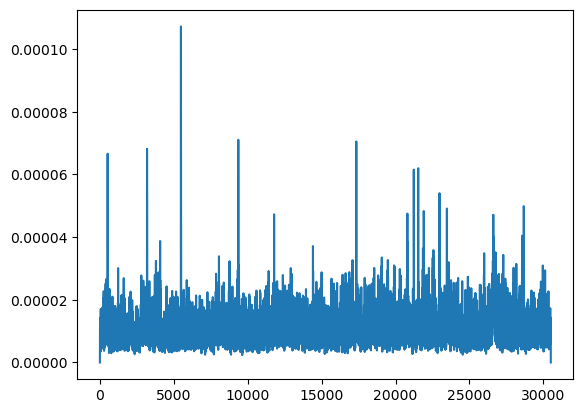

In [3]:
Y=np.array(eeglab_raw.get_data())
#Y=np.array([[ 1.,2.],[3.,4.]])
meanEEG=np.mean(Y,axis=0)
print(meanEEG.shape)
#crea un array numpy de tamaño meanEEG.shape[0] con valores 0 y llamalo GFP
GFP=np.zeros(meanEEG.shape[0])
N=Y.shape[0]
for i in range(meanEEG.shape[0]):
    GFP[i]=np.sqrt(np.sum((Y[:,i]-meanEEG[i])**2)/N)


print(GFP.shape)
#grafica el vector GFP contra el numero de muestras
#usemos matplotlib
import matplotlib.pyplot as plt
plt.plot(GFP)
plt.show()


In [4]:
print(Y.shape)

(32, 30504)


## Añadir GFP
Añadimos un nuevo canal al EEG que contenga la GFP de la señal.

In [5]:


# le damos forma al nuevo canal
reshaped_GFP = GFP.reshape(1, GFP.shape[0])
new_channel_data = reshaped_GFP
# Especifica el nombre del nuevo canal y su tipo
new_channel_name = 'GFP'
new_channel_type = 'eeg'

# Crea un objeto Info con la información del nuevo canal
new_channel_info = mne.create_info(ch_names=[new_channel_name], sfreq=eeglab_raw.info['sfreq'], ch_types=[new_channel_type])

# Crea un objeto RawArray con los datos del nuevo canal y la información del canal
new_channel_raw = mne.io.RawArray(new_channel_data, new_channel_info)

# Añade el objeto RawArray al objeto Raw existente
eeglab_raw.add_channels([new_channel_raw], force_update_info=True)


Creating RawArray with float64 data, n_channels=1, n_times=30504
    Range : 0 ... 30503 =      0.000 ...   238.305 secs
Ready.


<RawEEGLAB | eeglab_data.fdt, 33 x 30504 (238.3 s), ~7.7 MB, data loaded>

## Visualizamos la señal utilizano el método plot de MNE

In [6]:
#visualización de eeeglab_raw
eeglab_raw.plot()

Using qt as 2D backend.
Using pyopengl with version 3.1.6


### Vamos a visualizar solo el canal GFP

In [7]:
#demosle un nombre a un canal
channel_name='GFP'
channel_index=eeglab_raw.ch_names.index(channel_name)
#plot the GFP channel
eeglab_raw.plot(n_channels=1, scalings='auto', show=True, start=0, duration=10, order=[channel_index])

Using pyopengl with version 3.1.6


Channels marked as bad:
none
Channels marked as bad:
none
